In [ ]:
!pip install secml secml-malware python-magic numpy matplotlib


  Using cached secml-0.15.6-py3-none-any.whl.metadata (13 kB)
  Using cached secml_malware-0.4-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.0/464.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.9 MB/s eta 0:00:00


In [ ]:
# Clone the ember repository
!git clone https://github.com/elastic/ember.git

# Navigate to the ember directory
%cd ember

# Install ember
!pip install .



Cloning into 'ember'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 288 (delta 74), reused 64 (delta 64), pack-reused 194 (from 1)
Receiving objects: 100% (288/288), 11.36 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/ember
Processing /content/ember
  Preparing metadata (setup.py) ... done
  Created wheel for ember: filename=ember-0.1.0-py3-none-any.whl size=13049 sha256=d02ef9883c949ee045773ecb02f11a0718518b3978f19cc06ca604323d874100
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxt1__o1/wheels/89/b4/75/7e8a6daea4a30cca447d2161aec0db60973a0241096f337560
Successfully built ember


In [ ]:

import secml
import secml_malware
import magic
print("Libraries installed successfully!")
from ember import PEFeatureExtractor
print("Ember installed successfully!")


Libraries installed successfully!
Ember installed successfully!


In [ ]:
import os

# Set the base path to the dataset on Google Drive
DATASET_PATH = '/content/drive/MyDrive/Dataset'

# Check if the dataset path exists
print(f"Dataset path exists: {os.path.exists(DATASET_PATH)}")

# List files in the root of the dataset directory
if os.path.exists(DATASET_PATH):
    print("Listing files in the dataset root:")
    print(os.listdir(DATASET_PATH))
else:
    print(f"Dataset path does not exist: {DATASET_PATH}")


Dataset path exists: True
Listing files in the dataset root:
['Virus', 'Benign']


In [ ]:
import os

def list_exe_files_recursively(base_path):
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(base_path):
        # Filter for .exe files in each directory
        exe_files = [file for file in files if file.endswith('.exe')]
        if exe_files:
            print(f"Found .exe files in {root}:")
            for file in exe_files:
                print(f"  - {file}")
        else:
            print(f"No .exe files found in {root}.")

# Set the base path
benign_path = os.path.join(DATASET_PATH, 'Benign')
virus_path = os.path.join(DATASET_PATH, 'Virus')

# List .exe files recursively in both the Benign and Virus directories
print("Listing .exe files in Benign directory:")
list_exe_files_recursively(benign_path)

print("\nListing .exe files in Virus directory:")
list_exe_files_recursively(virus_path)



Streaming output truncated to the last 5000 lines.
  - 484af9b940a89c2084f749f44c3c412e8bee3898.exe
  - 44d1abece10f71923a0bebf02bbd19823403bef0.exe
  - 419888601c27c20d7fa23af7969f68378636dc74.exe
  - 40a6c470ffceff02060fb2b648ded3306dd4feef.exe
  - 5035c21303261c5ea471d8775e5cec821d2fd2ab.exe
  - 42e17ca8f973580690b7b09b8400006f6b55f004.exe
  - 431001f2705779df896a52e9bf4d387618586c95.exe
  - 42a51c3249ca84d0652165f3d40bfb5e330d263c.exe
  - 451ddd740e4096f194b5fa57d260d271b01c8045.exe
  - 43de36494ca3439b8fc88cb9a023a47c12659416.exe
  - 50d4c1fa3639943ed5f50c4f7f5efc394c902244.exe
  - 510c3f31b4cca0ab61869e5c5d18768b3980e72e.exe
  - 42ae1f2b3874161bd6f7a726c8ef5569c9219edb.exe
  - 49dd8b3cb68b0f30db3107644d6dd833facbad72.exe
  - 40d8c8516d16b389d555970007ae16e2bb6b751f.exe
  - 446667b4c0ec585046cd5af2e88289670bfea935.exe
  - 556dd08bddb53f09c25d7fa485fb8e9ba6187f3c.exe
  - 526dc3fcb909c04ad09487f03548071ba2249c33.exe
  - 52465b605011e5ff5a49656d4986b78e34ed98ff.exe
  - 54de229b87847b

In [ ]:
import os
import torch
import random
import numpy as np

# Set the base path for your dataset
DATASET_PATH = '/content/drive/MyDrive/Dataset'

# Define a function to list and load .exe files into dataset
def list_and_load_exe_files(base_path, label):
    dataset = []
    for root, dirs, files in os.walk(base_path):
        # Only consider .exe files
        exe_files = [file for file in files if file.endswith('.exe')]
        if exe_files:
            print(f"Found .exe files in {root}:")
            for file in exe_files:
                print(f"  - {file}")
                file_path = os.path.join(root, file)
                with open(file_path, 'rb') as f:
                    byte_data = f.read()
                    byte_tensor = torch.tensor(list(byte_data), dtype=torch.uint8)

                    # Truncate or pad to a fixed length (512 bytes for simplicity)
                    if len(byte_tensor) > 512:
                        byte_tensor = byte_tensor[:512]
                    else:
                        byte_tensor = torch.cat([byte_tensor, torch.zeros(512 - len(byte_tensor), dtype=torch.uint8)])

                    dataset.append((byte_tensor, label))  # Append file data and corresponding label (0 for benign, 1 for virus)

    return dataset

# Load Benign and Virus datasets
benign_path = os.path.join(DATASET_PATH, 'Benign')
virus_path = os.path.join(DATASET_PATH, 'Virus')

benign_data = list_and_load_exe_files(benign_path, label=0)  # Label 0 for benign
virus_data = list_and_load_exe_files(virus_path, label=1)  # Label 1 for virus

# Combine both datasets
dataset = benign_data + virus_data

# Shuffle the dataset for training
random.shuffle(dataset)

# Split into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print(f"Loaded {len(train_dataset)} training samples and {len(test_dataset)} testing samples.")


Streaming output truncated to the last 5000 lines.
  - 44d1abece10f71923a0bebf02bbd19823403bef0.exe
  - 419888601c27c20d7fa23af7969f68378636dc74.exe
  - 40a6c470ffceff02060fb2b648ded3306dd4feef.exe
  - 5035c21303261c5ea471d8775e5cec821d2fd2ab.exe
  - 42e17ca8f973580690b7b09b8400006f6b55f004.exe
  - 431001f2705779df896a52e9bf4d387618586c95.exe
  - 42a51c3249ca84d0652165f3d40bfb5e330d263c.exe
  - 451ddd740e4096f194b5fa57d260d271b01c8045.exe
  - 43de36494ca3439b8fc88cb9a023a47c12659416.exe
  - 50d4c1fa3639943ed5f50c4f7f5efc394c902244.exe
  - 510c3f31b4cca0ab61869e5c5d18768b3980e72e.exe
  - 42ae1f2b3874161bd6f7a726c8ef5569c9219edb.exe
  - 49dd8b3cb68b0f30db3107644d6dd833facbad72.exe
  - 40d8c8516d16b389d555970007ae16e2bb6b751f.exe
  - 446667b4c0ec585046cd5af2e88289670bfea935.exe
  - 556dd08bddb53f09c25d7fa485fb8e9ba6187f3c.exe
  - 526dc3fcb909c04ad09487f03548071ba2249c33.exe
  - 52465b605011e5ff5a49656d4986b78e34ed98ff.exe
  - 54de229b87847ba3350288098e31c6aefa5db4f7.exe
  - 52723066750b46

In [ ]:
pip install torch torchvision scikit-learn numpy Pillow


Training data shape: (6279, 224, 224)
Training labels shape: (6279,)
Testing data shape: (2667, 224, 224)
Testing labels shape: (2667,)


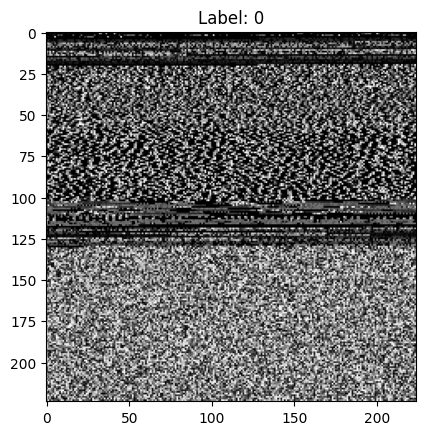

Train dataloader length: 197
Test dataloader length: 84


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SimpleLeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)
ModifiedResNet18(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReL

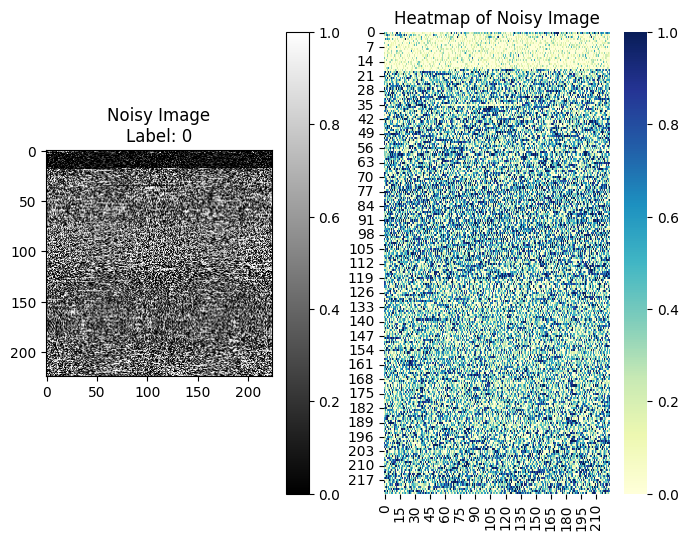

Adversarial image saved as: /content/drive/MyDrive/Dataset/adv_exe/adv_2_image.exe


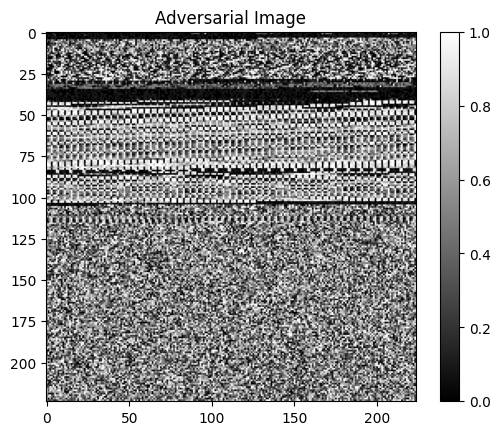

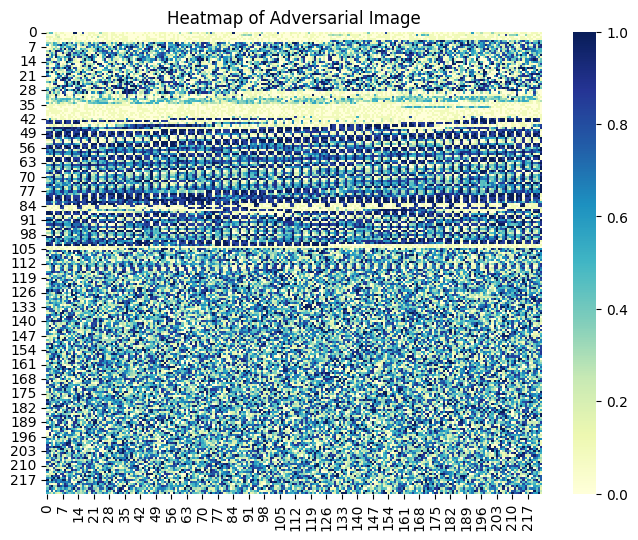

<ipython-input-17-ab4bd560e1d8>:234: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  noisy_images = torch.tensor([add_noise_to_image(img.numpy(), noise_factor) for img in images]).float()


Black-box attack success rate: 91.64%
White-box attack success rate: 99.55%


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.models as models


# Step 1: Convert .exe files to grayscale images
def exe_to_image(exe_file, size=(224, 224)):
    """
    Convert an .exe file into a grayscale image representation.
    """
    with open(exe_file, 'rb') as f:
        content = np.frombuffer(f.read(), dtype=np.uint8)

    image = content[:size[0] * size[1]]  # Truncate if file is too large
    image = np.pad(image, (0, size[0] * size[1] - len(image)), mode='constant')  # Pad if file is too small
    image = image.reshape(size[0], size[1])  # Reshape to image size
    return image


# Step 2: Load .exe dataset and convert to images
def load_exe_data(directory, size=(224, 224)):
    images = []
    labels = []

    for label, folder in enumerate(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                filepath = os.path.join(folder_path, filename)
                if filepath.lower().endswith('.exe'):
                    try:
                        image = exe_to_image(filepath, size)
                        images.append(image)
                        labels.append(label)
                    except Exception as e:
                        print(f"Skipping file {filepath} due to error: {e}")

    return np.array(images), np.array(labels)


# Load training and testing data
X_train_img, y_train_img = load_exe_data('/content/drive/MyDrive/Dataset/Virus/Virus train')
X_test_img, y_test_img = load_exe_data('/content/drive/MyDrive/Dataset/Virus/Virus test')

print(f"Training data shape: {X_train_img.shape}")
print(f"Training labels shape: {y_train_img.shape}")
print(f"Testing data shape: {X_test_img.shape}")
print(f"Testing labels shape: {y_test_img.shape}")

# Display an example image
plt.imshow(X_train_img[0], cmap='gray')
plt.title(f"Label: {y_train_img[0]}")
plt.show()


# Step 3: Preprocess images and create DataLoaders
def preprocess_images(X, y, batch_size=32):
    X = X.astype(np.float32) / 255.0  # Normalize to [0, 1]
    X = np.expand_dims(X, axis=-1)  # Add channel dimension (grayscale)
    X = torch.tensor(X).permute(0, 3, 1, 2).float()  # Convert to PyTorch tensors and cast to float32
    y = torch.tensor(y)

    dataset = TensorDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader


train_dataloader = preprocess_images(X_train_img, y_train_img)
test_dataloader = preprocess_images(X_test_img, y_test_img)

print(f"Train dataloader length: {len(train_dataloader)}")
print(f"Test dataloader length: {len(test_dataloader)}")


# Step 4: Define models
class SimpleLeNet(nn.Module):
    def __init__(self):
        super(SimpleLeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)  # Assuming 5 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class ModifiedResNet18(nn.Module):
    def __init__(self):
        super(ModifiedResNet18, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, 5)

    def forward(self, x):
        return self.model(x)


# Instantiate models
lenet_model = SimpleLeNet()
resnet_model = ModifiedResNet18()

print(lenet_model)
print(resnet_model)


# Step 5: Black-box attack (add noise to image)
def add_noise_to_image(image, noise_factor=0.2):
    noise = np.random.randn(*image.shape) * noise_factor
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip values between 0 and 1
    return noisy_image


# Example: Add noise to an image
sample_image, sample_label = next(iter(train_dataloader))
noisy_image = add_noise_to_image(sample_image[0].numpy(), noise_factor=0.2)

# Visualize noisy image with heatmap
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image.squeeze(), cmap='gray')
plt.title(f"Noisy Image\nLabel: {sample_label[0].item()}")
plt.colorbar()

# Plot heatmap of noisy image
plt.subplot(1, 2, 2)
sns.heatmap(noisy_image.squeeze(), cmap='YlGnBu', annot=False, cbar=True)
plt.title("Heatmap of Noisy Image")
plt.show()


# Step 6: White-box attack
def white_box_attack(model, image, label, epsilon=0.1):
    image.requires_grad = True
    output = model(image)
    loss = F.cross_entropy(output, label)
    loss.backward()

    adversarial_image = image + epsilon * image.grad.sign()
    adversarial_image = torch.clamp(adversarial_image, 0, 1)  # Keep within [0, 1]
    return adversarial_image


# Apply white-box attack
sample_image, sample_label = next(iter(train_dataloader))
sample_image = sample_image[0].unsqueeze(0)
adversarial_image = white_box_attack(resnet_model, sample_image, sample_label[0].unsqueeze(0))

# Save the adversarial image as an .exe file
adv_exe_dir = '/content/drive/MyDrive/Dataset/adv_exe'
os.makedirs(adv_exe_dir, exist_ok=True)


# Function to save adversarial image as .exe file
def save_adversarial_image_as_exe(adversarial_image, filename, output_dir):
    """
    Convert the adversarial image back into byte format and save it as an .exe file.
    """
    # Flatten the image to 1D
    adversarial_image_flat = adversarial_image.flatten()

    # Ensure the file is the correct length by padding or truncating
    file_size = 224 * 224  # 224x224 image size
    if len(adversarial_image_flat) > file_size:
        adversarial_image_flat = adversarial_image_flat[:file_size]
    elif len(adversarial_image_flat) < file_size:
        adversarial_image_flat = np.pad(adversarial_image_flat, (0, file_size - len(adversarial_image_flat)), mode='constant')

    # Save the flattened byte array as an .exe file
    exe_path = os.path.join(output_dir, filename)
    with open(exe_path, 'wb') as f:
        f.write(adversarial_image_flat.tobytes())  # Write the byte array to the file

    print(f"Adversarial image saved as: {exe_path}")


# Save the adversarial image as an .exe file
adversarial_filename = f"adv_{sample_label[0].item()}_image.exe"  # Generate a filename based on label
save_adversarial_image_as_exe(adversarial_image.squeeze().detach().numpy(), adversarial_filename, adv_exe_dir)


# Visualize adversarial image with heatmap
adversarial_image_np = adversarial_image.squeeze().detach().numpy()  # Remove unnecessary dimensions

if adversarial_image_np.ndim == 3:  # Handle shape (C, H, W)
    adversarial_image_np = adversarial_image_np.transpose(1, 2, 0)  # Convert to (H, W, C)

if adversarial_image_np.ndim == 2:  # Grayscale image
    plt.imshow(adversarial_image_np, cmap='gray')
elif adversarial_image_np.ndim == 3:  # RGB image
    plt.imshow(adversarial_image_np)
else:
    raise ValueError(f"Unexpected shape for adversarial image: {adversarial_image_np.shape}")

plt.title("Adversarial Image")
plt.colorbar()
plt.show()

# Plot heatmap of adversarial image
plt.figure(figsize=(8, 6))
sns.heatmap(adversarial_image_np, cmap='YlGnBu', annot=False, cbar=True)
plt.title("Heatmap of Adversarial Image")
plt.show()


# Step 7: Calculate the success rate for the black-box and white-box attacks

def calculate_success_rate(model, dataloader, attack_type='black', noise_factor=0.2, epsilon=0.1):
    success_count = 0
    total_count = 0

    model.eval()  # Set model to evaluation mode
    for images, labels in dataloader:
        images = images.float()  # Ensure images are float32
        labels = labels.long()  # Ensure labels are long (int64)

        if attack_type == 'black':
            # Apply black-box attack (adding noise to images)
            noisy_images = torch.tensor([add_noise_to_image(img.numpy(), noise_factor) for img in images]).float()
            outputs = model(noisy_images)
        elif attack_type == 'white':
            # Apply white-box attack
            noisy_images = white_box_attack(model, images, labels, epsilon)
            outputs = model(noisy_images)

        _, predicted = torch.max(outputs.data, 1)
        success_count += (predicted != labels).sum().item()
        total_count += labels.size(0)

    success_rate = success_count / total_count
    return success_rate


# Calculate success rates for both black-box and white-box attacks
black_box_success_rate = calculate_success_rate(resnet_model, test_dataloader, attack_type='black', noise_factor=0.2)
white_box_success_rate = calculate_success_rate(resnet_model, test_dataloader, attack_type='white', epsilon=0.1)

print(f"Black-box attack success rate: {black_box_success_rate * 100:.2f}%")
print(f"White-box attack success rate: {white_box_success_rate * 100:.2f}%")
